<ipython-input-2-6d9f7dc9da1f>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


iter_num 0


<ipython-input-2-6d9f7dc9da1f>:95: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


iter_num 1
iter_num 2


<ipython-input-2-6d9f7dc9da1f>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


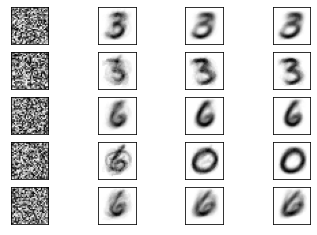

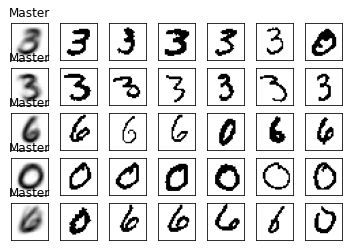

In [2]:
# 혼합 베르누이 분포에 의한 수기 문자 분류



# 분류 결과 표시
def show_figure(mu, cls):
    fig = plt.figure()
    for c in range(K):
        subplot = fig.add_subplot(K,7,c*7+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('Master')
        subplot.imshow(mu[c].reshape(28,28), cmap=plt.cm.gray_r)
        i = 1
        for j in range(len(cls)):
            if cls[j] == c:
                subplot = fig.add_subplot(K,7,c*7+i+1)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.imshow(df.iloc[j].values.reshape(28,28), cmap=plt.cm.gray_r)
                i += 1
                if i > 6:
                    break
    fig.show()



# 트레이닝 세트 읽기
df = pd.read_csv('sample-images_01.txt', sep=",", header=None)
data_num = len(df)

#초기 매개 변수의 설정
mix = [1.0/K] * K
mu = (rand(28*28*K)*0.5+0.25).reshape(K, 28*28)
for k in range(K):
    mu[k] /= mu[k].sum()

fig = plt.figure()
for k in range(K):
    subplot = fig.add_subplot(K, N+1, k*(N+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
fig.show()

#N회의 Iteration을 실시
for iter_num in range(N):
    print("iter_num %d" % iter_num)

    # E phase
    resp = DataFrame()
    for index, line in df.iterrows():
        tmp = []
        for k in range(K):
            a = mix[k] * bern(line, mu[k])
            if a == 0:
                tmp.append(0.0)
            else:
                s = 0.0
                for kk in range(K):
                    s += mix[kk] * bern(line, mu[kk])
                tmp.append(a/s)
        resp = resp.append([tmp], ignore_index=True)

    # M phase
    for k in range(K):
        nk = resp[k].sum()
        mix[k] = nk/data_num
        for index, line in df.iterrows():
            mu[k] += line * resp[k][index]
        mu[k] /= nk

        subplot = fig.add_subplot(K, N+1, k*(N+1)+(iter_num+1)+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
    fig.show()

# 트레이닝 세트의 문자를 분류
cls = []
for index, line in resp.iterrows():
    cls.append(np.argmax(line[0:]))

# 분류 결과 표시
show_figure(mu, cls)